**Analysis of Midterm 1**

Read data

In [101]:
import pandas as pd

file_path = 'Sep21.csv' # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
print(data.head())



               Student        ID SIS User ID SIS Login ID  Integration ID   
0      Points Possible       NaN         NaN          NaN             NaN  \
1        Abraham, Noah  370796.0      noaha3       noaha3     673076569.0   
2         Aceves, Ella  369481.0      eacev4       eacev4     650172007.0   
3       Adelman, Grace  355559.0        goa2         goa2     653520048.0   
4       Aguilar, Sofia  371356.0     sagui20      sagui20     677556395.0   

                                             Section  Final Exam (769478)   
0                                                NaN                100.0  \
1  MATH 112 EDD Fall 2023 CRN65474 and MATH 112 E...                  NaN   
2  MATH 112 EDK Fall 2023 CRN65624 and MATH 112 E...                  NaN   
3  MATH 112 EDB Fall 2023 CRN65472 and MATH 112 E...                  NaN   
4  MATH 112 EDT Fall 2023 CRN71636 and MATH 112 E...                  NaN   

   Exam 2 (769476)  Exam 1 (807152)  Exam 3 (769477)  ...   
0            

Data clean

In [102]:
data = data.drop(0).rename(columns={"Discussion Final Score":"discussion",
                            "ALEKS Quizzes Current Score": "quiz",
                            "ALEKS Pie Progress Goals Current Score":"pie_progress",
                            "Midterm Exams Current Score":"midterm1"})
final_data = data[["Student", "Section", "discussion", "quiz", "pie_progress", "midterm1"]]

In [103]:
import re
pattern = re.compile(r'112(.*?)Fall')
def search_pattern(text):
    match = re.search(pattern, text)
    return match.group(1).strip() if match else None
final_data["Discussion_Section"] = final_data["Section"].apply(search_pattern)
final_data

/var/folders/zp/dn7wl_9900s912r84dhhmcgh0000gn/T/ipykernel_6386/849431425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["Discussion_Section"] = final_data["Section"].apply(search_pattern)


,Student,Section,discussion,quiz,pie_progress,midterm1,Discussion_Section
1,"Abraham, Noah",MATH 112 EDD Fall 2023 CRN65474 and MATH 112 E...,50.00,102.56,65.00,90.00,EDD
2,"Aceves, Ella",MATH 112 EDK Fall 2023 CRN65624 and MATH 112 E...,50.00,102.04,100.00,80.00,EDK
3,"Adelman, Grace",MATH 112 EDB Fall 2023 CRN65472 and MATH 112 E...,37.50,103.45,100.00,80.00,EDB
4,"Aguilar, Sofia",MATH 112 EDT Fall 2023 CRN71636 and MATH 112 E...,50.00,102.56,100.00,100.00,EDT
5,"Ajasa, kehinde",MATH 112 EDI Fall 2023 CRN65597 and MATH 112 E...,12.50,51.22,52.00,100.00,EDI
...,...,...,...,...,...,...,...
419,"Zambrano, Astrid",MATH 112 EDH Fall 2023 CRN65478 and MATH 112 E...,25.00,87.24,100.00,80.00,EDH
420,"Zhang, Silong",MATH 112 EDT Fall 2023 CRN71636 and MATH 112 E...,25.00,95.38,100.00,100.00,EDT
421,"Zheng, Chloe",MATH 112 EDR Fall 2023 CRN71634 and MATH 112 E...,37.50,96.55,100.00,80.00,EDR
422,"Zhi, Wenqi",MATH 112 EDK Fall 2023 CRN65624 and MATH 112 E...,50.00,94.69,100.00,70.00,EDK


Average midterm 1 grade by Section (Greatest to lowest)

In [104]:
final_data['midterm1'] = pd.to_numeric(final_data['midterm1'], errors='coerce')
mean_midterm = final_data.groupby('Discussion_Section')['midterm1'].mean()
mean_midterm.sort_values(ascending=False)

/var/folders/zp/dn7wl_9900s912r84dhhmcgh0000gn/T/ipykernel_6386/4181355097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['midterm1'] = pd.to_numeric(final_data['midterm1'], errors='coerce')


Discussion_Section
-Algebra-Sections EL1, EL2, MATH 112 EDA    100.000000
EDI                                          82.986800
EDE                                          82.857143
EDR                                          82.250000
EDT                                          82.111111
EDM                                          81.212273
EDB                                          80.486923
EDD                                          79.160370
EDK                                          78.000000
EDH                                          77.733200
EDC                                          77.476429
EDQ                                          75.333182
EDA                                          75.277500
EDZ                                          74.128077
EDL                                          73.933500
EDF                                          73.332800
EDG                                          71.382593
EDO                                          6

Average quiz grade by Section (Greatest to lowest)

In [105]:
final_data['quiz'] = pd.to_numeric(final_data['quiz'], errors='coerce')
mean_quiz = final_data.groupby('Discussion_Section')['quiz'].mean()
mean_quiz.sort_values(ascending=False)

/var/folders/zp/dn7wl_9900s912r84dhhmcgh0000gn/T/ipykernel_6386/2364022254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['quiz'] = pd.to_numeric(final_data['quiz'], errors='coerce')


Discussion_Section
-Algebra-Sections EL1, EL2, MATH 112 EDA    102.560000
EDB                                          94.951429
EDA                                          93.823043
EDQ                                          93.724545
EDO                                          93.662308
EDR                                          93.651176
EDE                                          92.310455
EDH                                          92.250526
EDL                                          91.774211
EDC                                          91.411071
EDT                                          89.583810
EDI                                          88.429231
EDM                                          86.968696
EDK                                          86.698400
EDD                                          85.558929
EDF                                                NaN
EDG                                                NaN
EDZ                                           

Average pie progress grade by Section (Greatest to lowest)

In [106]:
final_data['pie_progress'] = pd.to_numeric(final_data['pie_progress'], errors='coerce')
mean_pie_progress = final_data.groupby('Discussion_Section')['pie_progress'].mean()
mean_pie_progress.sort_values(ascending=False)

/var/folders/zp/dn7wl_9900s912r84dhhmcgh0000gn/T/ipykernel_6386/4091631090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['pie_progress'] = pd.to_numeric(final_data['pie_progress'], errors='coerce')


Discussion_Section
-Algebra-Sections EL1, EL2, MATH 112 EDA    100.000000
EDF                                         100.000000
EDO                                         100.000000
EDL                                         100.000000
EDG                                         100.000000
EDZ                                         100.000000
EDC                                         100.000000
EDR                                          96.294118
EDA                                          93.521739
EDT                                          89.238095
EDI                                          88.884615
EDK                                          88.320000
EDM                                          86.173913
EDE                                          85.333333
EDB                                          83.428571
EDD                                          80.500000
EDH                                          79.736842
EDQ                                           

Average discussion grade by Section (Greatest to lowest)

In [107]:
final_data['discussion'] = pd.to_numeric(final_data['discussion'], errors='coerce')
mean_discussion = final_data.groupby('Discussion_Section')['discussion'].mean()
mean_discussion.sort_values(ascending=False)

/var/folders/zp/dn7wl_9900s912r84dhhmcgh0000gn/T/ipykernel_6386/2931114384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['discussion'] = pd.to_numeric(final_data['discussion'], errors='coerce')


Discussion_Section
-Algebra-Sections EL1, EL2, MATH 112 EDA    50.000000
EDQ                                         49.107273
EDO                                         48.703214
EDM                                         47.981304
EDC                                         47.704286
EDL                                         47.534286
EDE                                         46.972174
EDK                                         46.642800
EDI                                         45.718846
EDD                                         44.196429
EDT                                         40.476190
EDB                                         35.331786
EDG                                         35.076429
EDF                                         34.259259
EDA                                         33.714400
EDH                                         33.642800
EDZ                                         33.630769
EDR                                         33.333333
Name: dis

Meraged data

In [112]:
Summary_table = pd.merge(mean_midterm, mean_quiz, on='Discussion_Section')
Summary_table = pd.merge(Summary_table, mean_pie_progress, on='Discussion_Section')
Summary_table = pd.merge(Summary_table, mean_discussion, on='Discussion_Section')
Summary_table["overall_grade"] = Summary_table["pie_progress"]*0.2 + Summary_table["quiz"]*0.2+ Summary_table["midterm1"]*0.1+Summary_table["discussion"]*0.1
Summary_table.sort_values("overall_grade", ascending=False)

,midterm1,quiz,pie_progress,discussion,overall_grade
Discussion_Section,,,,,
"-Algebra-Sections EL1, EL2, MATH 112 EDA",100.000000,102.560000,100.000000,50.000000,55.512000
EDC,77.476429,91.411071,100.000000,47.704286,50.800286
EDO,69.999615,93.662308,100.000000,48.703214,50.602745
EDL,73.933500,91.774211,100.000000,47.534286,50.501621
EDR,82.250000,93.651176,96.294118,33.333333,49.547392
EDE,82.857143,92.310455,85.333333,46.972174,48.511689
EDA,75.277500,93.823043,93.521739,33.714400,48.368147
EDI,82.986800,88.429231,88.884615,45.718846,48.333334
EDT,82.111111,89.583810,89.238095,40.476190,48.023111


Visualization of midterm 1

Text(0, 0.5, 'Frequency')

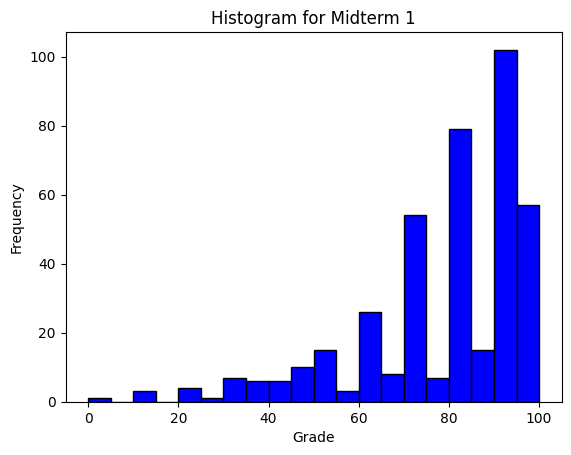

In [121]:
import matplotlib.pyplot as plt
midterm1_data = final_data["midterm1"]
plt.hist(midterm1_data, bins=20, color='blue', edgecolor='black')
plt.title('Histogram for Midterm 1')
plt.xlabel('Grade')
plt.ylabel('Frequency')